## Estimating avg time-to-finish by Monte Carlo simulation

1 2 3 4 5 6 7 8 9 10 [4.20077, 3.67137, 3.4463, 3.31322, 3.22894, 3.16629, 3.12444, 3.09008, 3.0688, 3.04891]


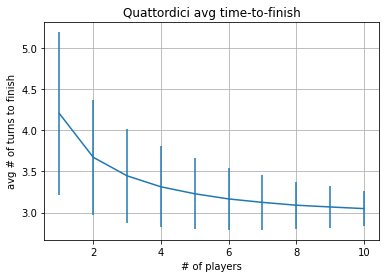

In [3]:
import statistics as stat
import random
import matplotlib.pyplot as plt

end = 14
attempts = 100000
nplayers = range(1, 11)
# The statistic we're computing
avg = [0] * len(nplayers)
stdev = [0] * len(nplayers)

for n in nplayers:
    print(n, end=' ', flush=True)
    lengths = []
    # For each game
    for attempt in range(attempts):
        winner = -1
        # List of current positions
        pos = [1] * len(nplayers)
        turns = 1
        while True:
            for i in range(n):
                dado = random.randint(1, 6)
                pos[i] += dado
                if (pos[i]>=end):
                    winner = i
                    break
            if (winner>=0):                
                break
            turns += 1            
        lengths.append(turns)
    avg[n-1] = stat.mean(lengths)
    stdev[n-1] = stat.pstdev(lengths)

print(avg)

# The plot
fig, ax = plt.subplots()
ax.errorbar(nplayers, avg, yerr=stdev)
ax.set(xlabel='# of players', ylabel='avg # of turns to finish', title='Quattordici avg time-to-finish')
ax.grid()
plt.show()

## Theoretical solution: absorption time in a MC

In [2]:
# Theoretical solution
import numpy as np

# Transient transition matrix for 1 player
#                   2    3    4    5    6    7     8    9   10   11   12   13
Q1 = np.array([[0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6,   0,   0,   0,   0,   0,   0],
               [0,   0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6,   0,   0,   0,   0,   0],
               [0,   0,   0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6,   0,   0,   0,   0],
               [0,   0,   0,   0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6,   0,   0,   0],
               [0,   0,   0,   0,   0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6,   0,   0],              
               [0,   0,   0,   0,   0,   0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6,   0],
               [0,   0,   0,   0,   0,   0,   0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
               [0,   0,   0,   0,   0,   0,   0,   0, 1/6, 1/6, 1/6, 1/6, 1/6],
               [0,   0,   0,   0,   0,   0,   0,   0,   0, 1/6, 1/6, 1/6, 1/6],
               [0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/6, 1/6, 1/6],
               [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/6, 1/6],
               [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/6],             
               [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
              ])

# Fundamental matrix
N = np.linalg.inv(np.identity(13) - Q1)
# Absorption-time vector
hit_time = N.dot(np.ones(13))
print(hit_time)

[4.19720553 3.90637531 3.61298219 3.32369373 3.04332478 2.77523077
 2.52162637 2.16139403 1.85262346 1.58796296 1.36111111 1.16666667
 1.        ]
